In [373]:
import pandas as pd
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from random import sample
import matplotlib.pyplot as plt
import numpy as np


count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


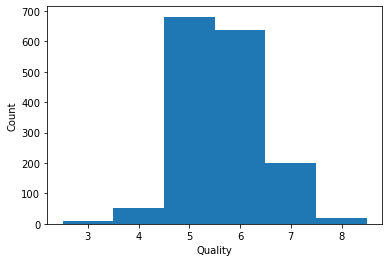

In [374]:
data = pd.read_csv (r'winequality-red.csv')
# print (data.head())
# print (data.shape)
print(data.quality.describe())
print(data.quality.value_counts())
def plot_wine_quality_histogram(quality):
    unique_vals = data['quality'].sort_values().unique()
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.hist(quality.values, bins=np.append(unique_vals, 9), align='left')
plot_wine_quality_histogram(data['quality'])

Στη συνέχεια χωρίζουμε το dataset σε training-test με αναλογία 75%-25%

In [375]:
y = data.quality
x = data.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
sth = X_train.head()
sth1 = X_test.head()
# print()
# print(X_train.shape)
#
# print()
# print(X_test.shape)
sth

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
582,11.7,0.490,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2
626,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
1030,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5
620,8.3,0.540,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4
490,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6


In [376]:
sth1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


εφαρμόζουμε τον αλγόριθμο SVM

In [377]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#features_raw = data.drop(['quality'], axis = 1)
#classifier = SVC(C=1, kernel='poly', degree=11, gamma=0.1, class_weight='balanced', random_state=0)
classifier = SVC(random_state=5, kernel="rbf", C=1000, gamma=0.01)
trained_model = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


Confusion matrix

In [378]:
cm_SVM = confusion_matrix(y_test, y_pred)
cm_SVM

array([[  0,   0,   1,   0,   0,   0],
       [  1,   0,   9,   3,   0,   0],
       [  1,   1, 121,  38,   3,   0],
       [  0,   6,  46, 106,  10,   1],
       [  0,   1,   1,  24,  21,   1],
       [  0,   0,   0,   2,   3,   0]], dtype=int64)

Precision score

In [379]:
precision = precision_score(y_test, y_pred, average="weighted")
precision

0.6056888056465897

Recall score

In [380]:
recall = recall_score(y_test, y_pred, average="weighted")
recall


0.62

Accuracy score

In [381]:
accuracy = accuracy_score(y_test, y_pred)*100
accuracy


62.0

Αφαιρούμε το 33% της στήλης PH


In [382]:
erased = len(X_train) * 33 // 100
not_erased = len(X_train) - erased
nancol = random.sample(range(len(X_train)), erased) #παίρνω τυχαίο δείγμα του 33%

median = 0
for index in range(len(X_train)):
    if index not in nancol:
        median += X_train[index][8]  #αφαιρώ το 33% της στηλης ph


1. Αφαιρούμε την στήλη PH

In [383]:
no_ph = x.drop('pH', axis=1)
x1_train, x1_test, y1_train, y1_test = sklearn.model_selection.train_test_split(no_ph, y, test_size=0.25)
classifier = SVC(random_state=5, kernel="rbf", C=1000, gamma=0.01)
trained_model = classifier.fit(x1_train, y_train)
y1_pred = classifier.predict(x1_test)
print(sklearn.metrics.classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.37      0.50      0.43       156
           6       0.45      0.33      0.38       178
           7       0.12      0.11      0.12        45
           8       0.00      0.00      0.00         5

    accuracy                           0.35       400
   macro avg       0.16      0.16      0.15       400
weighted avg       0.36      0.35      0.35       400



2. Συμπληρώνουμε τις τιμές με τον μέσο όρο των στοιχείων της στήλης

In [384]:
X_median = X_train
median = median / not_erased

for index in nancol:
    X_train[index][8 ] = median

classifier = SVC(random_state=5, kernel="rbf", C=1000, gamma=0.01)
trained_model = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.08      0.09        13
           5       0.66      0.73      0.69       164
           6       0.63      0.63      0.63       169
           7       0.54      0.42      0.47        48
           8       0.00      0.00      0.00         5

    accuracy                           0.62       400
   macro avg       0.32      0.31      0.31       400
weighted avg       0.61      0.62      0.61       400



3. Συμπληρώνουμε τις τιμές χρησιμοποιώντας Logistic Regression

In [385]:
X_ph = data['pH'] #η στήλη με τα missing values
X_noph, y_noph, X_testph, Y_testph = train_test_split( j,z, test_size=0.25, random_state=42)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_noph, y_noph)
y_pred = logistic_regression.predict(X_testph)

classifier = SVC(random_state=5, kernel="rbf", C=1000, gamma=0.01)
trained_model = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
sklearn.metrics.classification_report(y_test, y_pred)

NameError: name 'j' is not defined

4.	Εφαρμόζουμε K-means και συμπληρώνουμε τις τιμές που λείπουν με τον αριθμητικό μέσο όρο της συστάδας στην οποία ανήκει το δείγμα

